In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Attribute

We use the following representation to collect the dataset

age - age

bp - blood pressure

sg - specific gravity

al - albumin

su - sugar

rbc - red blood cells

pc - pus cell

pcc - pus cell clumps

ba - bacteria

bgr - blood glucose random

bu - blood urea

sc - serum creatinine

sod - sodium

pot - potassium

hemo - hemoglobin

pcv - packed cell volume

wc - white blood cell count

rc - red blood cell count

htn - hypertension

dm - diabetes mellitus

cad - coronary artery disease

appet - appetite

pe - pedal edema

ane - anemia

class - class


Attribute Information:

We use 24 + class = 25 ( 11 numeric ,14 nominal)

1.Age(numerical) - age in years

2.Blood Pressure(numerical) - bp in mm/Hg

3.Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)

4.Albumin(nominal) - al - (0,1,2,3,4,5) g/dl

5.Sugar(nominal) - su - (0,1,2,3,4,5)

6.Red Blood Cells(nominal) - rbc - (normal,abnormal)

7.Pus Cell (nominal) - pc - (normal,abnormal)

8.Pus Cell clumps(nominal) - pcc - (present,notpresent)

9.Bacteria(nominal) - ba - (present,notpresent)

10.Blood Glucose Random(numerical) - bgr in mgs/dl

11.Blood Urea(numerical) - bu in mgs/dl

12.Serum Creatinine(numerical) - sc in mgs/dl(miligram/deciliter)

13.Sodium(numerical) - sod in mEq/L

14.Potassium(numerical) - pot in mEq/L

15.Hemoglobin(numerical) - hemo in gms/deciliter

16.Packed Cell Volume(numerical) - pcv

17.White Blood Cell Count(numerical) - wc in cells/cumm

18.Red Blood Cell Count(numerical) - rc in millions/cmm(cubic millimeter)

19.Hypertension(nominal) - htn - (yes,no)

20.Diabetes Mellitus(nominal) - dm - (yes,no)

21.Coronary Artery Disease(nominal) - cad - (yes,no)

22.Appetite(nominal) - appet - (good,poor)

23.Pedal Edema(nominal) - pe - (yes,no)

24.Anemia(nominal) - ane - (yes,no)

25.Class (nominal) - class - (ckd,notckd)

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib import style

import keras as k
from keras.models import Sequential, load_model
from sklearn.metrics import accuracy_score
from keras.layers import Dense

In [ ]:
kidney_disease = 'drive/My Drive/kidney_disease.csv'
df = pd.read_csv(kidney_disease)

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.drop(['pc', 'pcc', 'ba', 'rbc', 'cad', 'appet', 'pe', 'ane'], axis=1, inplace=True)

In [ ]:
print(df.dtypes)

age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
classification     object
dtype: object


In [ ]:
for col in df.columns:
    print(col, df[col].unique())

age [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
bp [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
sg [1.02  1.01  1.005 1.015   nan 1.025]
al [ 1.  4.  2.  3.  0. nan  5.]
su [ 0.  3.  4.  1. nan  2.  5.]
bgr [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 297. 233. 294. 323. 125.  90.
 308. 118. 224. 128. 122. 214. 213. 268. 256.  84. 105. 288. 139.  78.
 273. 242. 424

In [ ]:
df['pcv'].replace('\t?', '0', inplace=True)
df['pcv'].replace('\t43', '43', inplace=True)
df['wc'].replace("\t?", "0", inplace=True)
df['wc'].replace("\t6200", "6200", inplace=True)
df['wc'].replace("\t8400", "8400", inplace=True)
df['rc'].replace('\t?', '0', inplace=True)
df['dm'].replace("\tno", "no", inplace=True)
df['dm'].replace("\tyes", "yes", inplace=True)
df['dm'].replace(" yes", "yes", inplace=True)
df['classification'].replace('ckd\t', 'ckd', inplace=True)

In [ ]:
df['pcv'] = df['pcv'].astype(float)
df['wc'] = df['wc'].astype(float)
df['rc'] = df['rc'].astype(float)

In [ ]:
df['age'].fillna(round(df['age'].mean(), 2), inplace=True)
df['bp'].fillna(round(df['bp'].mean(), 2), inplace=True)
df['sg'].fillna(round(df['sg'].mean(), 2), inplace=True)
df['al'].fillna(round(df['al'].mean(), 2), inplace=True)
df['su'].fillna(round(df['su'].mean(), 2), inplace=True)
df['bgr'].fillna(round(df['bgr'].mean(), 2), inplace=True)
df['bu'].fillna(round(df['bu'].mean(), 2), inplace=True)
df['sc'].fillna(round(df['sc'].mean(), 2), inplace=True)
df['sod'].fillna(round(df['sod'].mean(), 2), inplace=True)
df['pot'].fillna(round(df['pot'].mean(), 2), inplace=True)
df['hemo'].fillna(round(df['hemo'].mean(), 2), inplace=True)
df['pcv'] = df['pcv'].replace({0: np.nan}).fillna(df['pcv'].mean()).round(2)
df['wc'] = df['wc'].replace({0: np.nan}).fillna(df['wc'].mean()).round(2)
df['rc'] = df['rc'].replace({0: np.nan}).fillna(df['rc'].mean()).round(2)
df['classification'] = np.where(df['classification']=='ckd', 1, 0)
df['htn'] = np.where(df['htn']=='yes', 1, 0)
df['dm'] = np.where(df['dm']=='yes', 1, 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   bgr             400 non-null    float64
 6   bu              400 non-null    float64
 7   sc              400 non-null    float64
 8   sod             400 non-null    float64
 9   pot             400 non-null    float64
 10  hemo            400 non-null    float64
 11  pcv             400 non-null    float64
 12  wc              400 non-null    float64
 13  rc              400 non-null    float64
 14  htn             400 non-null    int64  
 15  dm              400 non-null    int64  
 16  classification  400 non-null    int64  
dtypes: float64(14), int64(3)
memory usa

In [ ]:
df.isna().any()

age               False
bp                False
sg                False
al                False
su                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
classification    False
dtype: bool

In [ ]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
classification    0
dtype: int64

In [ ]:
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,classification
0,48.0,80.0,1.020,1.0,0.0,121.00,36.0,1.2,137.53,4.63,15.4,44.0,7800.0,5.20,1,1,1
1,7.0,50.0,1.020,4.0,0.0,148.04,18.0,0.8,137.53,4.63,11.3,38.0,6000.0,4.69,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.00,53.0,1.8,137.53,4.63,9.6,31.0,7500.0,4.69,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.00,56.0,3.8,111.00,2.50,11.2,32.0,6700.0,3.90,1,0,1
4,51.0,80.0,1.010,2.0,0.0,106.00,26.0,1.4,137.53,4.63,11.6,35.0,7300.0,4.60,0,0,1


In [ ]:
df.to_csv('cleanedckd.csv', index = False, encoding='utf-8')

In [ ]:
data = pd.read_csv('cleanedckd.csv')

# Choose a variable of interest
variable_of_interest = 'classification'

# Compute the correlation coefficients between the variable of interest and all other variables
corr_list = data.corrwith(data[variable_of_interest]).sort_values(ascending=False)

# Remove the correlation coefficient between the variable of interest and itself
corr_list = corr_list.drop(variable_of_interest)

# Print the sorted list of correlations
print(corr_list)

al      0.599390
htn     0.590438
dm      0.559060
bgr     0.401376
bu      0.372033
su      0.327803
sc      0.294076
bp      0.290601
age     0.225403
wc      0.203360
pot     0.077063
sod    -0.342268
rc     -0.595404
sg     -0.659504
pcv    -0.691693
hemo   -0.729537
dtype: float64


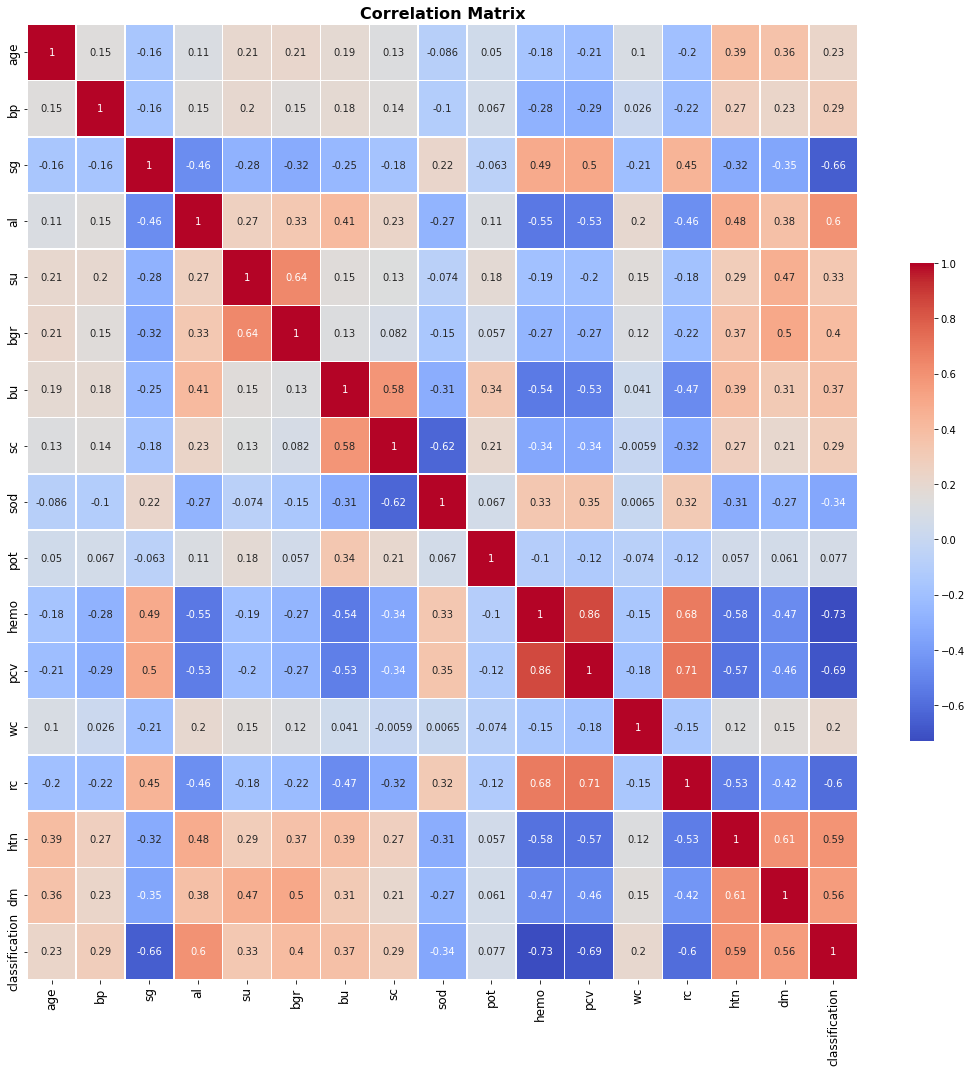

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax, cbar_kws={'shrink': 0.5, 'orientation': 'vertical'})
plt.title("Correlation Matrix", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Split data into features (X) and target variable (y)
X = df.drop('classification', axis=1)
y = df['classification']

# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Use Recursive Feature Elimination to select the top 10 features
rfe = RFE(estimator=rfc, n_features_to_select=10, step=1)
rfe.fit(X, y)

# Print the top 10 features
print('Top 10 Features:', X.columns[rfe.support_])

Top 10 Features: Index(['sg', 'al', 'bgr', 'bu', 'sc', 'hemo', 'pcv', 'rc', 'htn', 'dm'], dtype='object')


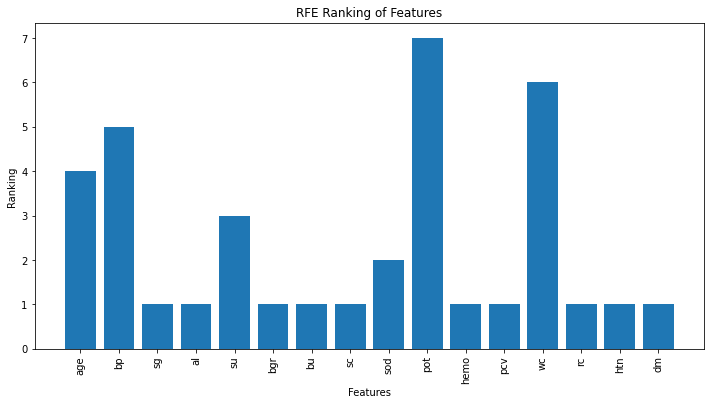

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart of feature importances
plt.figure(figsize=(12,6))
plt.bar(range(len(rfe.ranking_)), rfe.ranking_)
plt.xticks(range(len(rfe.ranking_)), X.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('RFE Ranking of Features')
plt.show()


In [ ]:
columns_to_retain =  ['sg', 'al', 'bgr', 'bu', 'sc', 'hemo', 'pcv', 'rc', 'htn', 'dm', 'classification']

In [ ]:
df = df.drop( [col for col in df.columns if not col in columns_to_retain] , axis=1)
#drop the rows with na or missing values
df= df.dropna(axis = 0)

In [ ]:
df.head()

,sg,al,bgr,bu,sc,hemo,pcv,rc,htn,dm,classification
0,1.020,1.0,121.00,36.0,1.2,15.4,44.0,5.20,1,1,1
1,1.020,4.0,148.04,18.0,0.8,11.3,38.0,4.69,0,0,1
2,1.010,2.0,423.00,53.0,1.8,9.6,31.0,4.69,0,1,1
3,1.005,4.0,117.00,56.0,3.8,11.2,32.0,3.90,1,0,1
4,1.010,2.0,106.00,26.0,1.4,11.6,35.0,4.60,0,0,1


In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_scaler = MinMaxScaler()
x = x_scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

x_train = x_train
x_test = x_test
y_train = y_train
y_test = y_test
x_scaler = x_scaler

In [ ]:
from keras import backend as K
import tensorflow as tf

# Define custom metrics
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        return true_positives / (possible_positives + K.epsilon())

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        return true_positives / (predicted_positives + K.epsilon())

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
classifier = Sequential()
classifier.add(Dense(128, input_dim=len(x_train[0]), kernel_initializer='random_normal', activation='relu'))
classifier.add(Dense(1, activation='hard_sigmoid'))
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC(curve='ROC')])
history = classifier.fit(x_train, y_train, epochs=1000, batch_size=x_train.shape[0])

Epoch 1/1000


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


1/1 [==============================] - 1s 905ms/step - loss: 0.7083 - accuracy: 0.1719 - f1: 0.2895 - precision: 0.3214 - recall: 0.2634 - auc: 0.1534
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.7008 - accuracy: 0.2562 - f1: 0.4080 - precision: 0.4162 - recall: 0.4000 - auc: 0.2007
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6936 - accuracy: 0.4437 - f1: 0.6147 - precision: 0.5525 - recall: 0.6927 - auc: 0.3172
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6866 - accuracy: 0.6094 - f1: 0.7573 - precision: 0.6290 - recall: 0.9512 - auc: 0.5037
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6798 - accuracy: 0.6344 - f1: 0.7763 - precision: 0.6384 - recall: 0.9902 - auc: 0.7134
Epoch 6/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.6731 - accuracy: 0.6406 - f1: 0.7810 - precision: 0.6406 - recall: 1.0000 - auc: 0.8560
Epoch 7/1000
1/1 [================

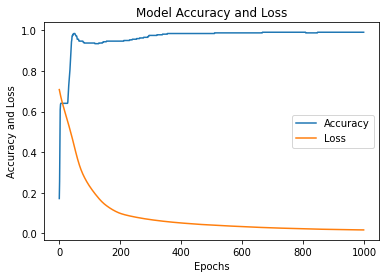

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'],label= 'Loss')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend();

In [ ]:
_, mlp_acc = classifier.evaluate(x_test, y_test)
print(f"MLP has accuracy of {mlp_acc * 100:.2f} % ")

NameError: ignored

In [ ]:
def f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_score = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_score

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

from sklearn.metrics import roc_auc_score

def auc_roc(y_true, y_pred):
    return roc_auc_score(y_true, y_pred)

accuracy_scores = history.history['accuracy']
f1_scores = history.history['f1']
precision_scores = history.history['precision']
recall_scores = history.history['recall']
auc_roc_scores = history.history['auc_roc']

# Plot f1 score
plt.plot(history.history['f1'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot precision
plt.plot(history.history['precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot recall
plt.plot(history.history['recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot AUC-ROC
plt.plot(history.history['auc_roc'])
plt.title('Model AUC-ROC')
plt.ylabel('AUC-ROC')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


KeyError: ignored

In [ ]:
history = classifier.fit(x_train, y_train, epochs=2000, batch_size=x_train.shape[0])
f1_scores = history.history['f1']

Epoch 1/2000
1/1 [==============================] - 1s 597ms/step - loss: 0.0179 - accuracy: 0.9906 - f1: 0.9927
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0181 - accuracy: 0.9906 - f1: 0.9927
Epoch 3/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.0179 - accuracy: 0.9906 - f1: 0.9927
Epoch 4/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.0178 - accuracy: 0.9906 - f1: 0.9927
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0179 - accuracy: 0.9906 - f1: 0.9927
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0178 - accuracy: 0.9906 - f1: 0.9927
Epoch 7/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0176 - accuracy: 0.9906 - f1: 0.9927
Epoch 8/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.0176 - accuracy: 0.9906 - f1: 0.9927
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0176 - accuracy: 0.9906 - f1: